# The Mushrooms of North America.
## Why you should never eat a wild mushroom without an expert's identification.
Data source:https://www.kaggle.com/uciml/mushroom-classification

The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf 

Attribute Information: 

  * classes: edible=e, poisonous=p

  *  cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
  *  cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
  *  cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
  *  bruises: bruises=t,no=f
  *  odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
  *  gill-attachment: attached=a,descending=d,free=f,notched=n
  *  gill-spacing: close=c,crowded=w,distant=d
  *  gill-size: broad=b,narrow=n
  *  gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
  *  stalk-shape: enlarging=e,tapering=t
  *  stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
  *  stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
  *  stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
  *  stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
  *  stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
  *  veil-type: partial=p,universal=u
  *  veil-color: brown=n,orange=o,white=w,yellow=y
  *  ring-number: none=n,one=o,two=t
  *  ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
  *  spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
  *  population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
  *  habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
file = 'mushrooms.csv'
df = pd.read_csv(file)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# It is never a good idea to eat a wild mushroom without full identification.

![overview](mushroom_anatomy1.jpg)

<AxesSubplot:xlabel='class', ylabel='count'>

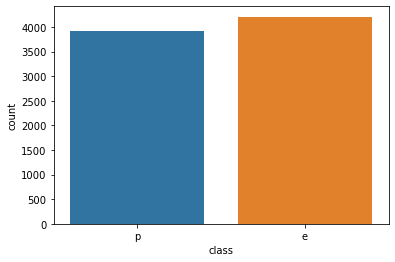

In [5]:
sns.countplot(x='class',data=df)

#### Roughly half of north american mushrooms are poisonous. You will need to identify further

Text(0.5, 1.0, 'Poisonous and Edible Mushroom Species Counts Based on Cap Shape')

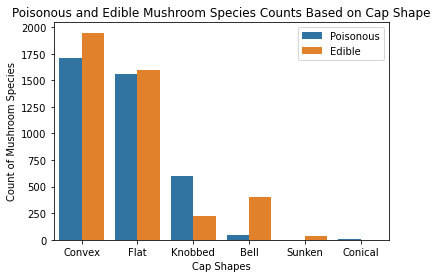

In [6]:
csplot = sns.countplot(data=df,x='cap-shape',hue='class',order=df['cap-shape'].value_counts().index)
csplot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel('Cap Shapes')
plt.ylabel('Count of Mushroom Species')
plt.title('Poisonous and Edible Mushroom Species Counts Based on Cap Shape')

#### The cap shape is an obvious identifier, but does not give a clear indication of poison levels. Bell and sunken mushrooms are more likely to be edible then convex, flat, conical, and knobbed, but there is always a chance it could be poisonous without full identification.

![Shapes](capshapes.jpg)

Text(0.5, 1.0, 'Poisonous and Edible Mushroom Species Counts Based on Cap Color')

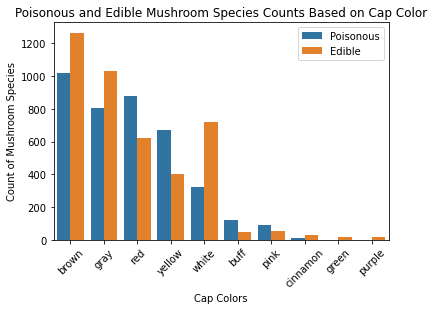

In [7]:
ccplot = sns.countplot(data=df,x='cap-color',hue='class',order=df['cap-color'].value_counts().index)
ccplot.set_xticklabels(('brown', 'gray', 'red', 'yellow', 'white', 'buff','pink',
                        'cinnamon','green','purple'))
plt.xticks(rotation=45)
#brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel('Cap Colors')
plt.ylabel('Count of Mushroom Species')
plt.title('Poisonous and Edible Mushroom Species Counts Based on Cap Color')

#### The color is another easy identifier. Only green and purple mushrooms are not poisonous. All others could be.

Text(0.5, 1.0, 'Poisonous and Edible Mushroom Species Counts Based on Habitat')

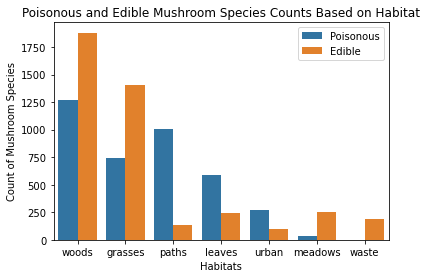

In [8]:
hplot = sns.countplot(data=df,x='habitat',hue='class',order=df['habitat'].value_counts().index)
hplot.set_xticklabels(['woods', 'grasses', 'paths', 'leaves', 'urban', 'meadows','waste'])
#habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel('Habitats')
plt.ylabel('Count of Mushroom Species')
plt.title('Poisonous and Edible Mushroom Species Counts Based on Habitat')

#### The habitat in which you found the mushroom could be a good indicator. Mushrooms growing from waste are always edible, but should definitely get washed first. Mushrooms in active places (paths, urban, near fallen leaves) have a higher chance of being poisonous, and that makes sense biologically as they need a way to protect themselves from natural predators.

Text(0.5, 1.0, 'Poisonous and Edible Mushroom Species Counts Based on Odor')

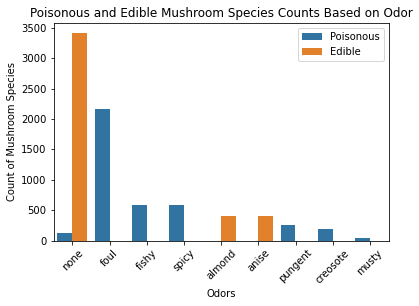

In [9]:
oplot = sns.countplot(data=df,x='odor',hue='class',order=df['odor'].value_counts().index)
oplot.set_xticklabels(['none', 'foul', 'fishy', 'spicy', 'almond', 'anise','pungent','creosote','musty'])
plt.xticks(rotation=45)
#odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel('Odors')
plt.ylabel('Count of Mushroom Species')
plt.title('Poisonous and Edible Mushroom Species Counts Based on Odor')

#### Odor is a very strong indicator of poison, but may be harder to individually interpret. Bad smelling mushrooms (foul, fishy, spicy, pungent, creosote (oily), must) are generally poisonous. Those without a smell are not likely to be poisonous, but you still wouldn't want to take a chance. Almond and anise smelling are indicators of edibility.

In [10]:
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
#     print(le.classes_)
    return le.transform(feat)

In [11]:
for col in df.columns:
    df[str(col)] = label_encoded(df[str(col)])
df.head()

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


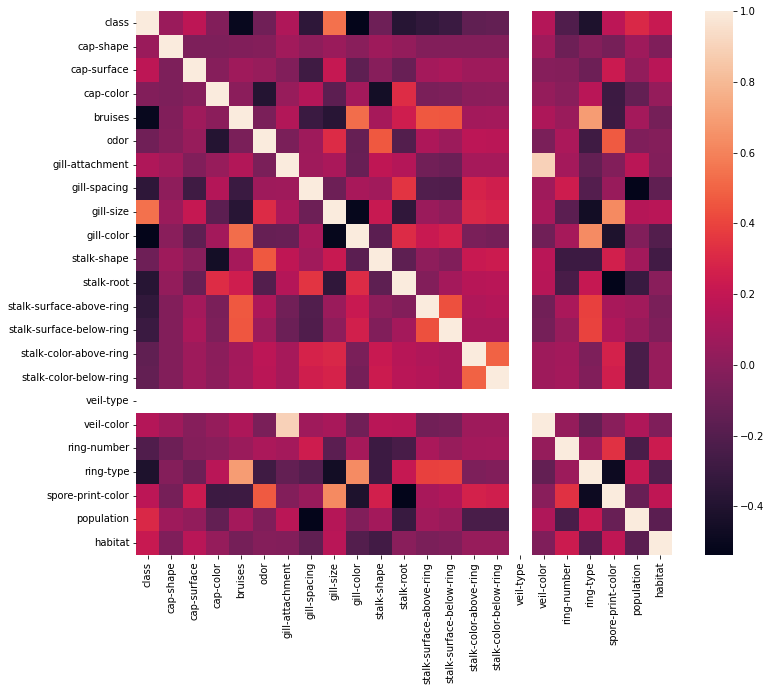

In [12]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr())

#### Looking at the correlation of traits, the ring type, stalk root, gil color, bruising, and stalk surface may be good features to explore for classification.